# The resource-consumer NP model with odeint

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

The code below represents the dynamics
$$\frac{dN}{dt}=-k NP$$
$$\frac{dP}{dt}=k NP$$
The parameter $k$ is an input to the function

In [2]:
# function that returns the right hand side of the above equations
def model(state,t,k): 
    N,P = state # the state variables are the nutrients (N) and the phytoplankton population (P) 
    Ndot = -k * N * P
    Pdot =  k * N * P
    return np.array([Ndot,Pdot])

Set the initial conditions, the time axis and solve the ODE

In [3]:
# initial conditions
K = 0.1
N0 = 5.
P0 = 0.1
state0 = np.array([N0,P0])

# time points (days)
t = np.linspace(0,20,num=100)

# solve ODE using odeint (remember that args is a tuple)
y = odeint(model,state0,t,args=(K,))

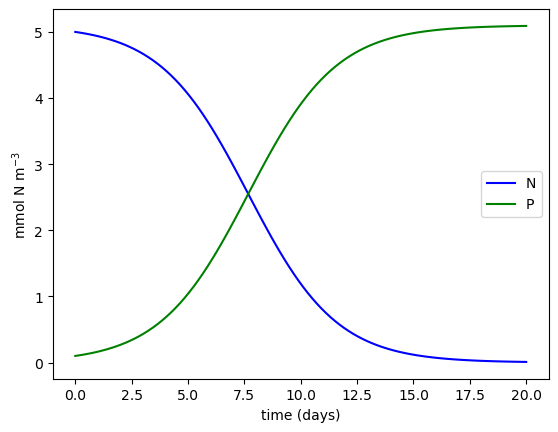

In [4]:
# plot the resulting time series
plt.plot(t,y[:,0],'b',label='N')
plt.plot(t,y[:,1],'g',label='P')
plt.xlabel('time (days)')
plt.ylabel('mmol N m$^{-3}$')
plt.legend()
plt.show()
%config InlineBackend.figure_format = 'svg'

# Exercise

1. What are the inputs and outputs in the function model? What kind of objects are they?

The first input is the `state` array which contains the state variables (N & P). The second input is `t`, which is an array of time (in days) from zero to 20 with 100 evenly spaced intervals. The third input is `k`, which is the growth rate of P, and it is a float. 

2. Write a new model to simulate the nutrient-phytoplankton-detritus system (NPD). Include a detritus variable D that is produced from the mortality of phytoplankton and it is remineralized as a nutrient. This will involve adding 2 new parameters: the mortality rate (phytoplankton lysis) and the remineralization rate.

The model equations can be written using latex. Check the code in the inital cell above. Otherwise you can use the equation editor on Word or LibreOffice.

### Model variables: 

$P = producers\ (mmol\ N\ m^{-3})$

$N = nutrients\ (mmol\ N\ m^{-3})$

$D = detritus\ (mmol\ N\ m^{-3})$

$t = time\ (d)$

### Model parameters:

$k = growth\ rate\ of\ P\ (d^{-1})$

$m = mortality\ rate\ of\ P\ (d^{-1})$

$r = remineralization\ rate\ of\ D\ (d^{-1})$

### Model equations: 

$\frac{dP}{dt} = kNP - mP$ 

(growth - mortality)

$\frac{dN}{dt} = -kNP + rD$ 

(-grazing + remineralization)

$\frac{dD}{dt} = mP - rD$ 

(supply by producer mortality - remineralization)

3. Write the code to solve the new model using odeint and propose some reasonable values for the parameters that lead to a realistic solution

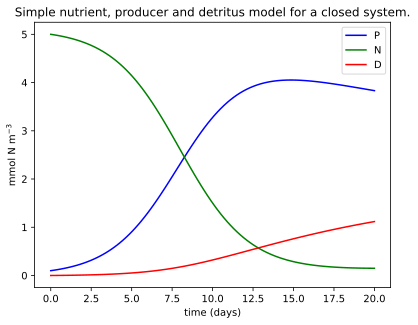

In [5]:
# function that returns the right hand side of the above equations
def model(state,t,k,m,r): 
    P,N,D = state # the state variables are the nutrients (N) and the phytoplankton population (P) as well as detritus (D) 
    Pdot =  k * N * P - (m * P)
    Ndot =  -k * N * P + (r * D)
    Ddot =  m * P - (r * D)
    return np.array([Pdot,Ndot,Ddot])

# set the initial conditions, time axis and solve the ODE 

# initial conditions
K = 0.1 # grow by 10 % a day
M = 0.03 # 3 % die a day 
R = 0.05 # 5 % of the detritus is remineralized in this closed system 
P0 = 0.1 
N0 = 5.
D0 = 0 # detritus starts off at zero - nutrients and phytoplankton introduced into a closed system
state0 = np.array([P0,N0,D0])

# time points (days)
t = np.linspace(0,20,num=100)

# solve ODE using odeint (remember that args is a tuple)
y = odeint(model,state0,t,args=(K,M,R)) # model function, initial condtions, time axis, and parameter K

#%% plot the resulting time series
plt.plot(t,y[:,0],'b',label='P')
plt.plot(t,y[:,1],'g',label='N')
plt.plot(t,y[:,2],'r',label='D')
plt.xlabel('time (days)')
plt.ylabel('mmol N m$^{-3}$')
plt.title('Simple nutrient, producer and detritus model for a closed system.')
plt.legend()
%config InlineBackend.figure_format = 'svg'